# Machine Learning - Lab
### Find the best clustering with __DBSCAN__
# Tasks
Find the clusters in the included dataset.

1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)
1. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any (2pt)
1. a clustering schema using a method of your choice exploring a range of parameter values (5pt)
1. the plot of the global inertia (SSD) and silhouette index for the parameter values you examine  (4pt)
1. the optimal parameters of your choice (4pt)
1. a pairplot of the data using as hue the cluster assignment with the optimal parameter (3pt)
1. a plot of the silhouette index for the data points, grouped according to the clusters (4pt)
1. A sorted list of the discovered clusters for decreasing sizes (7pt)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state = 42
np.random.seed(random_state)

filename = './datasets/lab_exercise.csv'
sep = ','

# 1

In [3]:
df = pd.read_csv(filename, sep=sep, header=None)
print(f'Dataset with {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

Dataset with 1500 rows and 4 columns


,0,1,2,3
0,0.548814,-4.893751,0.365316,0.715189
1,0.602763,-0.387057,1.164867,0.544883
2,0.423655,-10.844898,-7.553523,0.645894
3,0.437587,1.975564,-1.274422,0.891773
4,0.963663,-4.054276,0.064053,0.383442


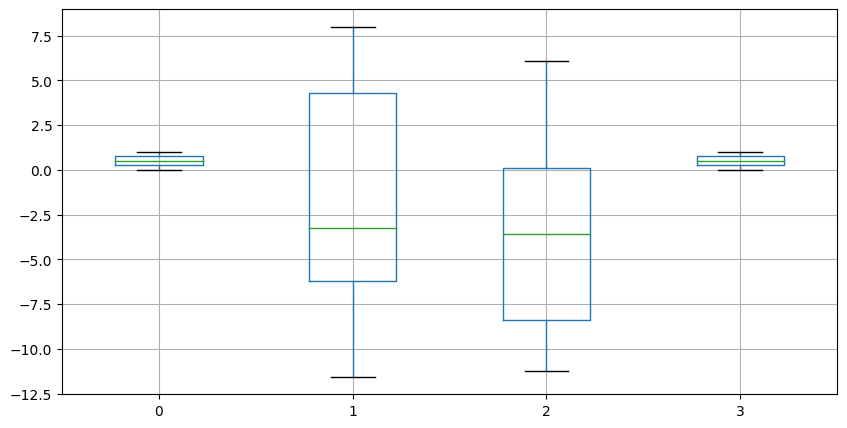

In [7]:
df.boxplot(figsize=(10, 5));

Cols 0,3 have a small range w.r.t. the other cols and also have a similar distribution. We can maybe consider to use a MinMaxScaler.

# 2

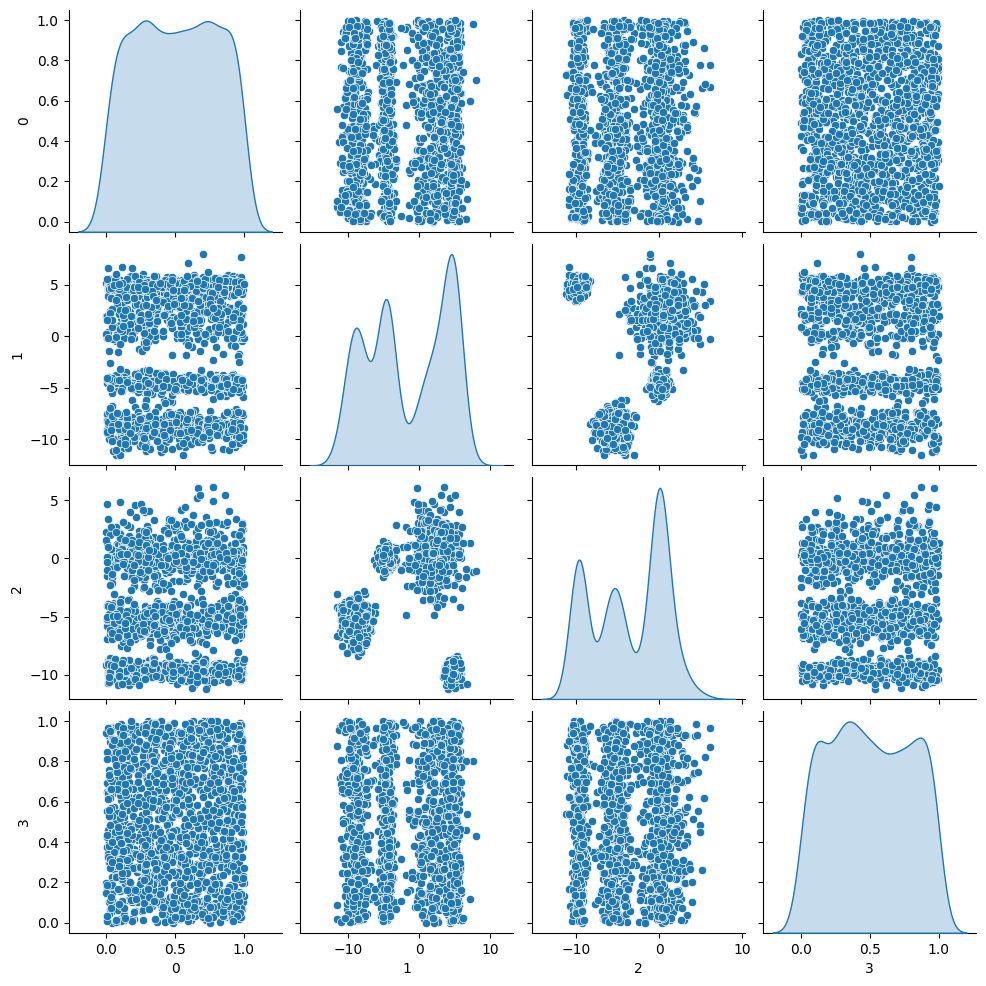

In [8]:
sns.pairplot(df, diag_kind='kde');

cols 0,3 show that the data is normally distributed.

In [9]:
in_cols = [1,2]

# 3

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix

max_clusters = 10
inertia = []
silhouette = []
for k in range(2, max_clusters+1):
    model = KMeans(n_clusters=k, random_state=random_state)
    pred = model.fit_predict(df)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(df, pred))

# 4

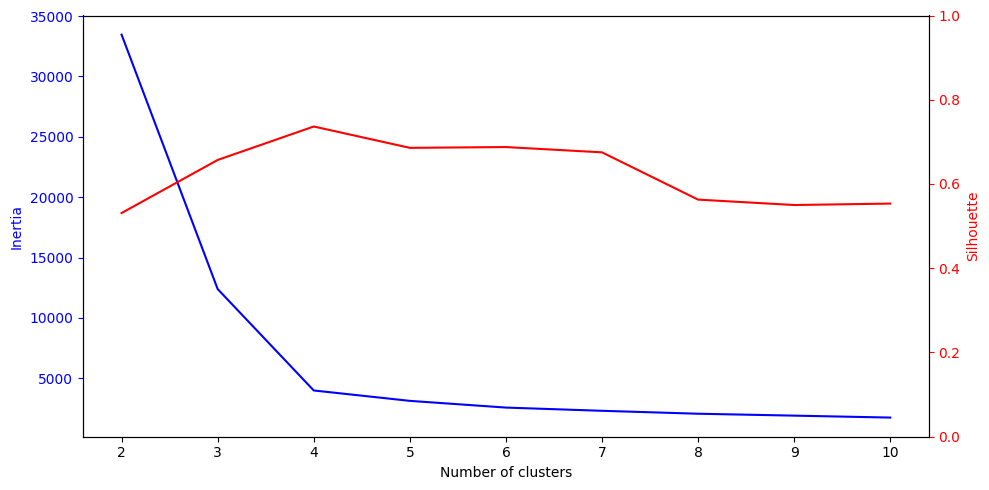

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(range(2, max_clusters+1), inertia, 'b-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_clusters+1), silhouette, 'r-')
ax2.set_ylabel('Silhouette', color='r')
ax2.tick_params('y', colors='r')
ax2.set_ylim([0, 1])

fig.tight_layout()
plt.show()

# 5

In [17]:
best_k = np.argmax(silhouette) + 2
print(f'Best k: {best_k}')

Best k: 4


# 6

In [18]:
km = KMeans(n_clusters=best_k, random_state=random_state)
y_km = km.fit_predict(df)

In [19]:
df['cluster'] = y_km

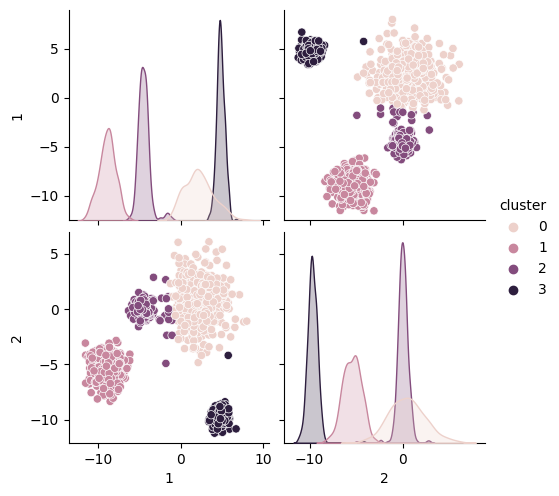

In [21]:
sns.pairplot(df[in_cols + ['cluster']], hue='cluster', diag_kind='kde', vars=df[in_cols].columns);

In [22]:
from matplotlib import cm
def plot_silhouette(silhouette_vals, y, colors = cm.tab10, plot_noise = False):
    """
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples
    plot_noise:      boolean, assumes the noise to be labeled with a negative integer
    
    """
    cluster_labels = np.unique(y)
    n_clusters = len(cluster_labels)
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
        if (c < 0 and plot_noise == False):
            continue
        c_silhouette_vals = silhouette_vals[y==c] # extracts records with the current cluster label
        c_silhouette_vals.sort() # sort the silhouette vals for the current class
        y_ax_upper += len(c_silhouette_vals)
        color = colors(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
        c_silhouette_avg = np.mean(c_silhouette_vals)
        plt.axvline(c_silhouette_avg, #ymin = y_ax_lower, ymax = y_ax_upper,
                    color=color, linestyle="-.")

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="black", linestyle=":") 
    plt.yticks(yticks, cluster_labels)# + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    # plt.savefig('./figures/silhouette.png', dpi=300)
    plt.show()

# 7

In [23]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(df, y_km, metric='euclidean')

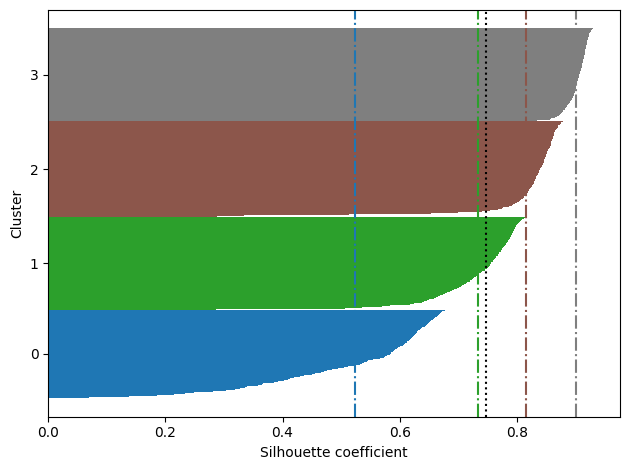

In [24]:
plot_silhouette(silhouette_vals, y_km)

# 8

In [27]:
counts = pd.DataFrame(y_km).groupby(0).size().reset_index(name='counts')
counts = counts.rename(columns={0: 'cluster'}).sort_values('counts', ascending=False)
counts

,cluster,counts
2,2,390
3,3,376
1,1,375
0,0,359
